<a href="https://colab.research.google.com/github/sp22adn/datascience-project/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


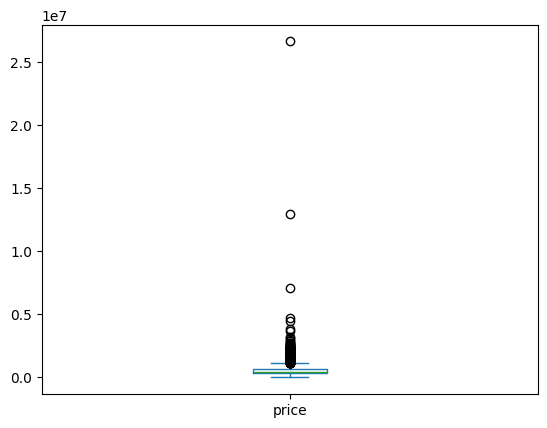

In [ ]:
df.price.plot(kind='box');

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# Convert the 'datetime' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day into separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
df = df.drop(columns=['date','country','year'])

In [ ]:
# Determine unique values for each column
unique_values = df.nunique()

# Consider columns as categorical if they have relatively few unique values
categorical_columns_num = unique_values[unique_values < 32].index.tolist()
# categorical_columns_num.extend(['yr_built', 'yr_renovated'])
print("Categorical columns that have numbers:", categorical_columns_num, '\n')


# Continuous numeric columns
continuous_numeric_cols = list(df.select_dtypes(include=['float64', 'int64', 'int32']).columns.difference(categorical_columns_num))
continuous_numeric_cols.remove('price')
print("Continuous numeric columns:", continuous_numeric_cols, '\n')


categorical_columns = list(df.select_dtypes(include='object').columns)
print("Categorical columns:", categorical_columns,'\n')


Categorical columns that have numbers: ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'month', 'day'] 

Continuous numeric columns: ['sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated'] 

Categorical columns: ['street', 'city', 'statezip'] 



In [ ]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
month            0
day              0
dtype: int64

In [ ]:
duplicated = df.duplicated()
print(df[duplicated])

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, month, day]
Index: []


<Axes: title={'center': 'Corr with continuous numerical columns'}>

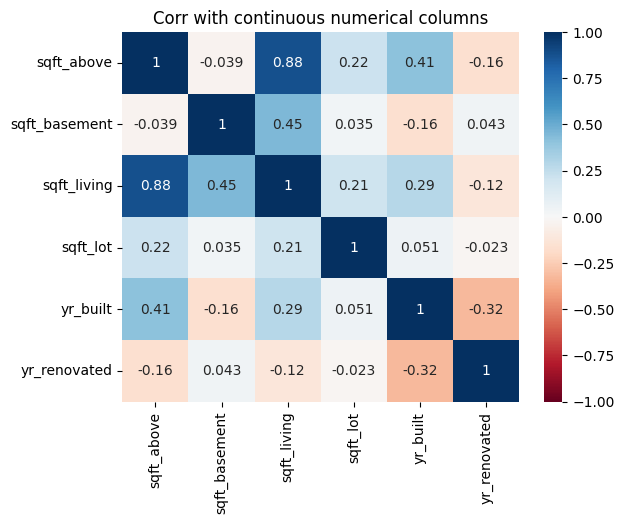

In [ ]:
import seaborn
numeric_df = df[continuous_numeric_cols]
plt.title('Corr with continuous numerical columns')
seaborn.heatmap(numeric_df.corr(),annot=True,vmin = -1,cmap='RdBu')

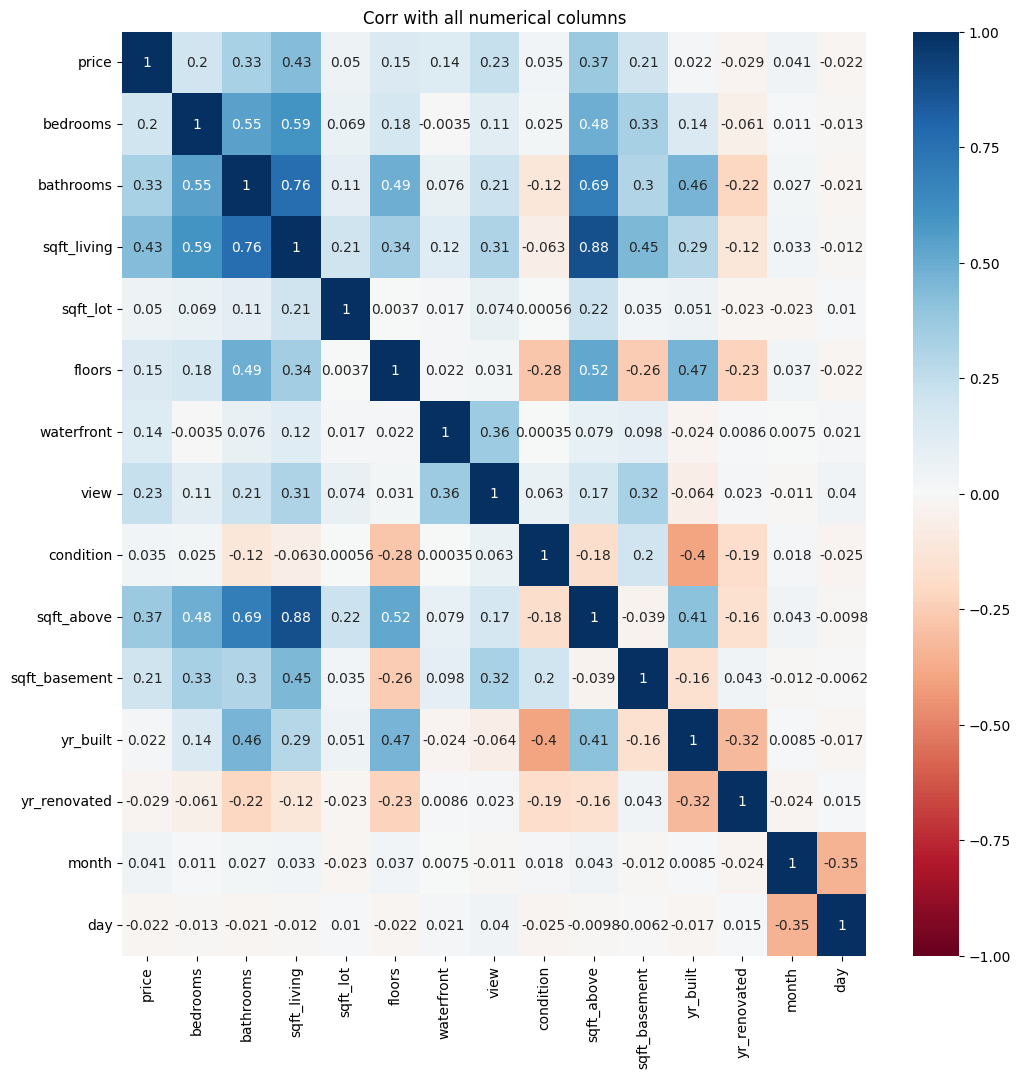

In [ ]:
plt.figure(figsize=(12,12))
numeric_df = df.select_dtypes(include=['number'])
plt.title('Corr with all numerical columns')
seaborn.heatmap(numeric_df.corr(),annot=True,vmin = -1,cmap='RdBu');

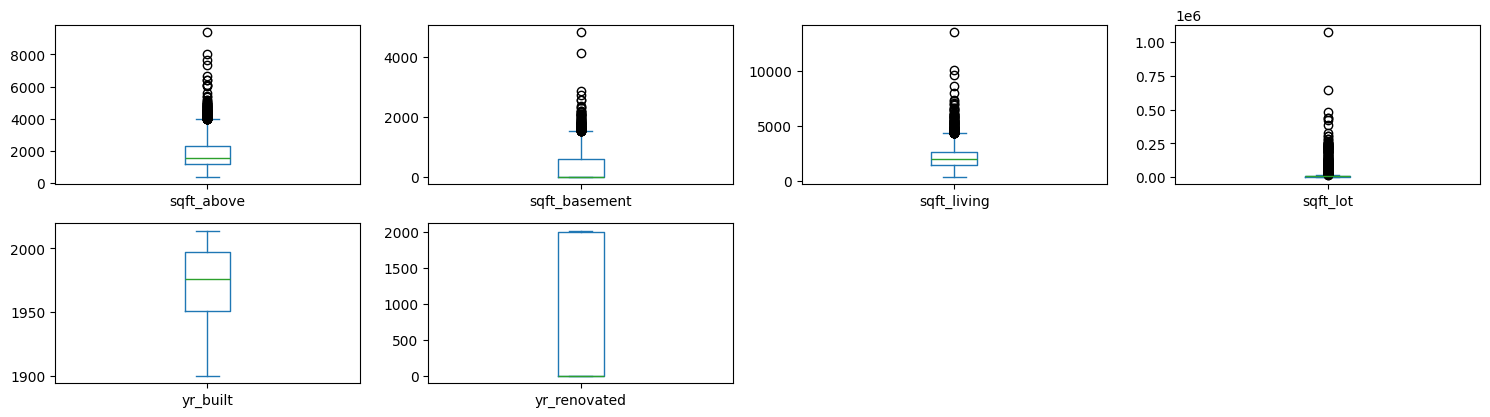

In [ ]:
# Box plot for numeric columns

df[continuous_numeric_cols].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
# IQR method to find outliers
Q1 = df[continuous_numeric_cols].quantile(0.25)
Q3 = df[continuous_numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[continuous_numeric_cols] < (Q1 - 1.5 * IQR)) | (df[continuous_numeric_cols] > (Q3 + 1.5 * IQR))
print(outliers.sum())

sqft_above       116
sqft_basement     82
sqft_living      129
sqft_lot         541
yr_built           0
yr_renovated       0
dtype: int64


In [ ]:
# Remove rows with outliers
df_no_outliers = df[~outliers.any(axis=1)]
df_no_outliers.shape

(3929, 18)

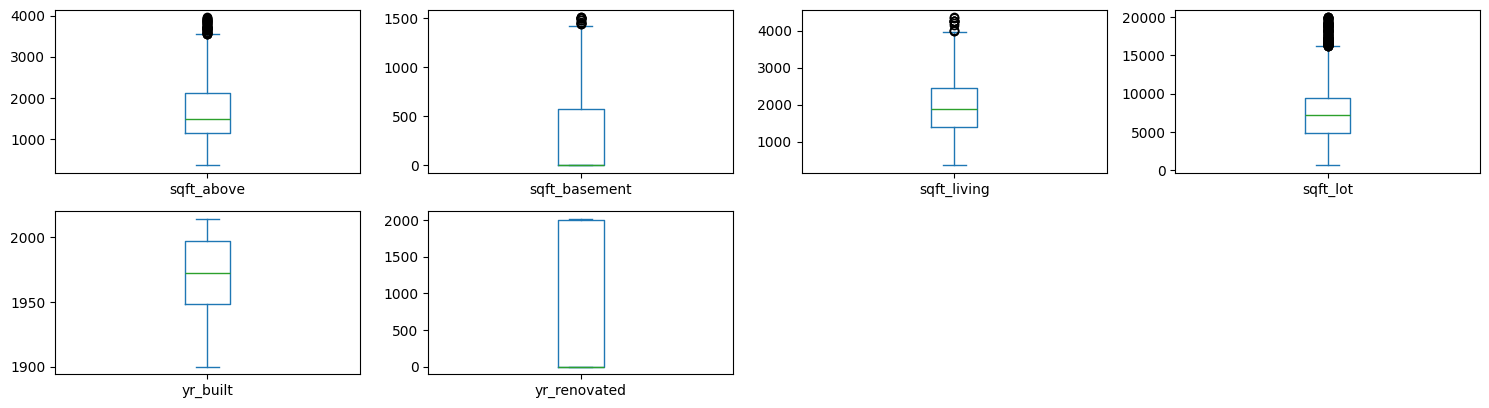

In [ ]:
# Box plot for numeric columns
# numeric_cols = df_no_outliers[list(continuous_numeric_cols)]
df_no_outliers[continuous_numeric_cols].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
for col in categorical_columns:
    print(f"Unique values for {col}:")
    print(df[col].nunique())
    print()

Unique values for street:
4525

Unique values for city:
44

Unique values for statezip:
77



In [ ]:
for col in categorical_columns_num:
    print(f"Unique values for {col}:")
    print(df[col].nunique())
    print()

Unique values for bedrooms:
10

Unique values for bathrooms:
26

Unique values for floors:
6

Unique values for waterfront:
2

Unique values for view:
5

Unique values for condition:
5

Unique values for month:
3

Unique values for day:
31



In [ ]:
final_df = df_no_outliers.drop(columns=categorical_columns)

In [ ]:
final_df.shape

(3929, 15)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example using Random Forest
X = final_df.drop('price', axis=1)
y = final_df['price']

# Convert categorical data to numeric using one-hot encoding
# X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Root Mean Squared Error:", np.round(np.sqrt(mean_squared_error(y_test, predictions)),2))

Root Mean Squared Error: 962190.08
